# ☕Coffee Sales☕ - EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('index.csv')
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


# Objectives
1. Which do customers prefer cash or card?
2. Which is the most bought coffee and least bought?
3. What time do customers mostly buy coffee?
4. Which coffee is likely to be in short supply? To increase pot brew?
5. Which coffee is likely to be in less demand? To decrease pot brew?
6. Is there impulse buying when customers use cash or card?
7. Which day of the week had the highest number of sales? And which had the highest revenue?


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         896 non-null    object 
 1   datetime     896 non-null    object 
 2   cash_type    896 non-null    object 
 3   card         807 non-null    object 
 4   money        896 non-null    float64
 5   coffee_name  896 non-null    object 
dtypes: float64(1), object(5)
memory usage: 42.1+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
money,896.0,34.143906,4.573951,23.02,28.9,34.5,37.72,40.0


In [5]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [6]:
df[df.card.isnull()]

,date,datetime,cash_type,card,money,coffee_name
12,2024-03-02,2024-03-02 10:30:35.668,cash,NaN,40.0,Latte
18,2024-03-03,2024-03-03 10:10:43.981,cash,NaN,40.0,Latte
41,2024-03-06,2024-03-06 12:30:27.089,cash,NaN,35.0,Americano with Milk
46,2024-03-07,2024-03-07 10:08:58.945,cash,NaN,40.0,Latte
49,2024-03-07,2024-03-07 11:25:43.977,cash,NaN,40.0,Latte
...,...,...,...,...,...,...
657,2024-05-31,2024-05-31 09:23:58.791,cash,NaN,39.0,Latte
677,2024-06-01,2024-06-01 20:54:59.267,cash,NaN,39.0,Cocoa
685,2024-06-02,2024-06-02 22:43:10.636,cash,NaN,34.0,Americano with Milk
691,2024-06-03,2024-06-03 21:42:51.734,cash,NaN,34.0,Americano with Milk


In [7]:
df = df.fillna('No Card')

In [8]:
df.isnull().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

In [9]:
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         896 non-null    datetime64[ns]
 1   datetime     896 non-null    datetime64[ns]
 2   cash_type    896 non-null    object        
 3   card         896 non-null    object        
 4   money        896 non-null    float64       
 5   coffee_name  896 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 42.1+ KB


In [10]:
#1. Which do customers prefer cash or card?
df.cash_type.value_counts()

cash_type
card    807
cash     89
Name: count, dtype: int64

In [11]:
# Plotly pie chart
payment_type = df.cash_type.value_counts()

fig = px.pie(values = payment_type.values, names = payment_type.index, title='Payment Distribution')
fig.show()

In [12]:
df.groupby('cash_type')['money'].sum()

cash_type
card    27406.94
cash     3186.00
Name: money, dtype: float64

In [13]:
#2. Which is the most bought coffee and least bought?
coffee_type = df['coffee_name'].value_counts()
coffee_type


coffee_name
Americano with Milk    203
Latte                  187
Cappuccino             164
Americano              133
Cortado                 85
Hot Chocolate           63
Espresso                35
Cocoa                   26
Name: count, dtype: int64

In [14]:
# Most money making coffee type
df.groupby('coffee_name')['money'].sum()

coffee_name
Americano              3786.42
Americano with Milk    6738.14
Cappuccino             6253.50
Cocoa                   995.66
Cortado                2422.80
Espresso                827.34
Hot Chocolate          2417.46
Latte                  7151.62
Name: money, dtype: float64

In [15]:
sales = df.groupby('coffee_name')['money'].sum()

fig = go.Figure()
fig.add_trace(go.Bar(
    y = sales.index,
    x = sales.values,
    orientation= 'h'
    
))

fig.update_layout(
    title = 'Coffee Purchases Price',
    xaxis_title = 'Price',
    yaxis_title = 'Coffee Name',
    bargap=0.1,
)
fig.show()

In [16]:
coffee_type = df['coffee_name'].value_counts()

fig = go.Figure()
fig.add_trace(go.Bar(
    y = coffee_type.index,
    x = coffee_type.values,
    orientation= 'h'
))

fig.update_layout(
    title = 'Coffee Purchases',
    xaxis_title = 'Number of Purchases',
    yaxis_title = 'Coffee Name',
    bargap=0.1
)
fig.show()

In [17]:
#Price of Coffee most sold and least sold


In [18]:
coffee_statistics = df.groupby('coffee_name')['money'].agg(['min','max'])
coffee_statistics

,min,max
coffee_name,,
Americano,27.92,30.0
Americano with Milk,32.82,35.0
Cappuccino,37.72,40.0
Cocoa,37.72,40.0
Cortado,27.92,30.0
Espresso,23.02,25.0
Hot Chocolate,37.72,40.0
Latte,37.72,40.0


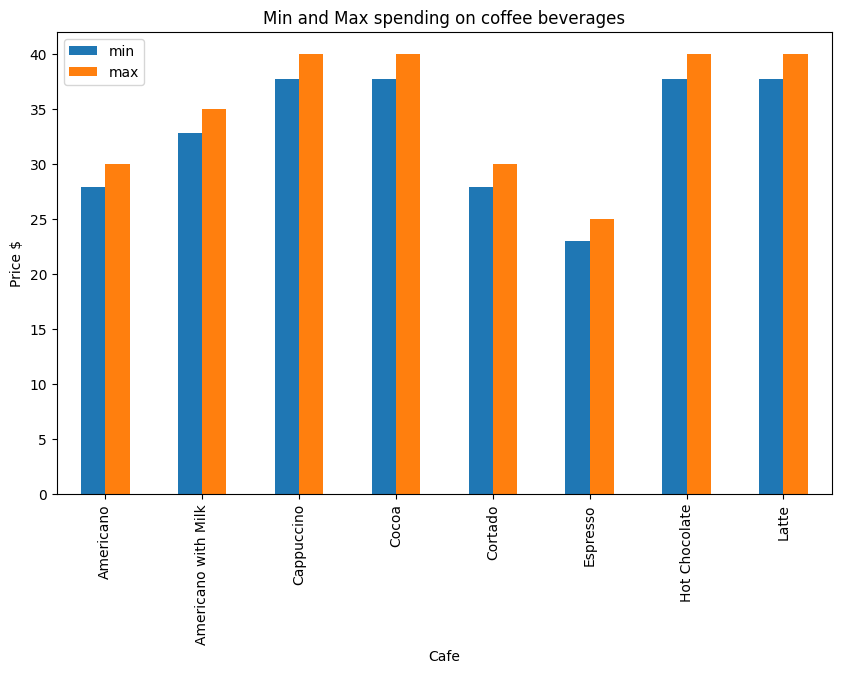

In [19]:
coffee_statistics = df.groupby('coffee_name')['money'].agg(['min','max'])

fig, ax = plt.subplots(figsize=(10,6))
coffee_statistics.plot(kind='bar', ax=ax)
ax.set_xlabel('Cafe')
ax.set_ylabel('Price $')
ax.set_title('Min and Max spending on coffee beverages')
ax.legend()

plt.show()


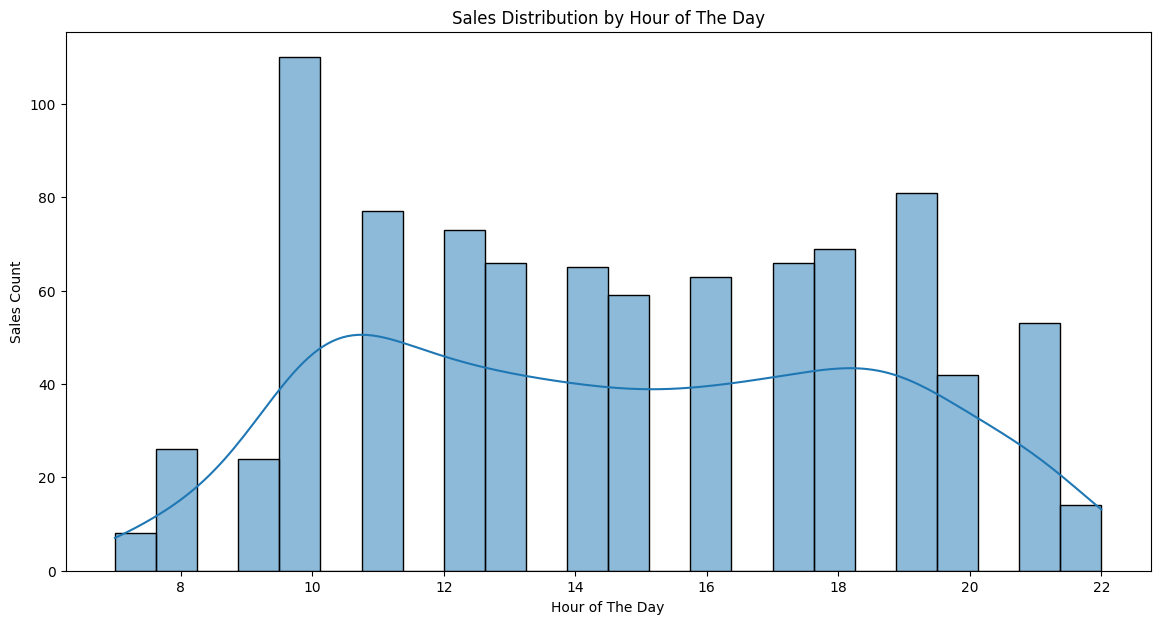

In [20]:
# 3. What time do customers mostly buy coffee?
df['hour'] = df['datetime'].dt.hour
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='hour', kde=True, bins=24)
plt.title('Sales Distribution by Hour of The Day')
plt.xlabel('Hour of The Day')
plt.ylabel('Sales Count')
plt.show()